The code in this notebook is designed to separate the monthly and yearly trends of the data. To do this, the trends of the annual datasets will be calculated. A list of values will then be created for each dataset which will contain a point for each month of the original dataset. The first point of this list will be zero. The following points will be calculated based on the date and the calculated slope of the yearly trend. These values will then be subtracted from the monthly dataset. The resulting data should approximately represent the monthly variation in the data without the affecct of the yearly change. this new monthly dataset can also be subtracted from the original dataset to provide us with a dataset that represents only the yearly change.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Load in monthly data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateData.txt', 'r') as file1:
    lines=file1.readlines()
    time=[]
    temp=[]
    co2=[]
    sea_ice_ext=[]
    pH=[]
    for i in lines:
        fulllines=i.split('\t')
        time.append(fulllines[0])
        temp.append(fulllines[2])
        co2.append(fulllines[1])
        sea_ice_ext.append(fulllines[4])
        pH.append(fulllines[5].replace("\n", ""))

#replace empty values in pH data with NaN (because pH data is missing values)
pH_n=[]
for string in (pH):
    if string == '':
        string = np.nan
    pH_n.append(string)


#convert data entries from strings to floats
times = [float(string) for string in time]
co2s=[float(string) for string in co2]
temps = [float(string) for string in temp]
phs = [float(string) for string in pH_n]
sea_ice_exts = [float(string) for string in sea_ice_ext]

In [3]:
#make new ph dataset without initial nan values
dictinit = {'Time': times[117:], 'ph':phs[117:]}
dfph = pd.DataFrame(dictinit)
dfph_int = dfph.interpolate()
ph_int = dfph_int['ph'].tolist() 
ph_int = ph_int[:408]
time_int = dfph_int['Time'].tolist()
time_int = time_int[:408]

#make annual dataset for pH
n = 12.0
year=time_int[::12]
ph_year = [sum(ph_int[i:i+12])/n for i in range(0,len(ph_int),12)]
year = year[:-1]
ph_y = ph_year[:-1]

In [4]:
#Load in annual data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateDataAnnual.txt', 'r') as file2:
    lines2=file2.readlines()
    time_y=[]
    temp_y=[]
    co2_y=[]
    sea_ice_ext_y=[]
    for i in lines2:
        fulllines=i.split('\t')
        time_y.append(fulllines[0])
        temp_y.append(fulllines[2])
        co2_y.append(fulllines[1])
        sea_ice_ext_y.append(fulllines[4])


#convert data entries from strings to floats
times_y = [float(string) for string in time_y]
co2s_y=[float(string) for string in co2_y]
temps_y = [float(string) for string in temp_y]
sea_ice_exts_y = [float(string) for string in sea_ice_ext_y]

In [63]:
times_y_np = np.array(times_y)
time_int_np = np.array(time_int)
times_np = np.array(times)
year_np = np.array(year)
co2_y_np = np.array(co2s_y)
temp_y_np = np.array(temps_y)
ice_ext_y_np = np.array(sea_ice_exts_y)
ph_y_np = np.array(ph_y)

In [11]:
a, b = np.polyfit(times_y_np, co2_y_np, 1)
a_temp, b_temp = np.polyfit(times_y_np, temp_y_np, 1)
a_ice, b_ice = np.polyfit(times_y_np, ice_ext_y_np, 1)
a_ph, b_ph = np.polyfit(year_np, ph_y_np, 1)

In [69]:
int_co2 = a*1979
int_temp = a_temp*1979
int_ice = a_ice*1979
int_ph = a_ph*1990
month_co2 = [x1 - x2 for (x1, x2) in zip(co2s, a*times_np-int_co2)]
month_temp = [x1 - x2 for (x1, x2) in zip(temps, a_temp*times_np-int_temp)]
month_ice = [x1 - x2 for (x1, x2) in zip(sea_ice_exts, a_ice*times_np-int_ice)]
month_ph = [x1 - x2 for (x1, x2) in zip(ph_int, a_ph*time_int_np-int_ph)]

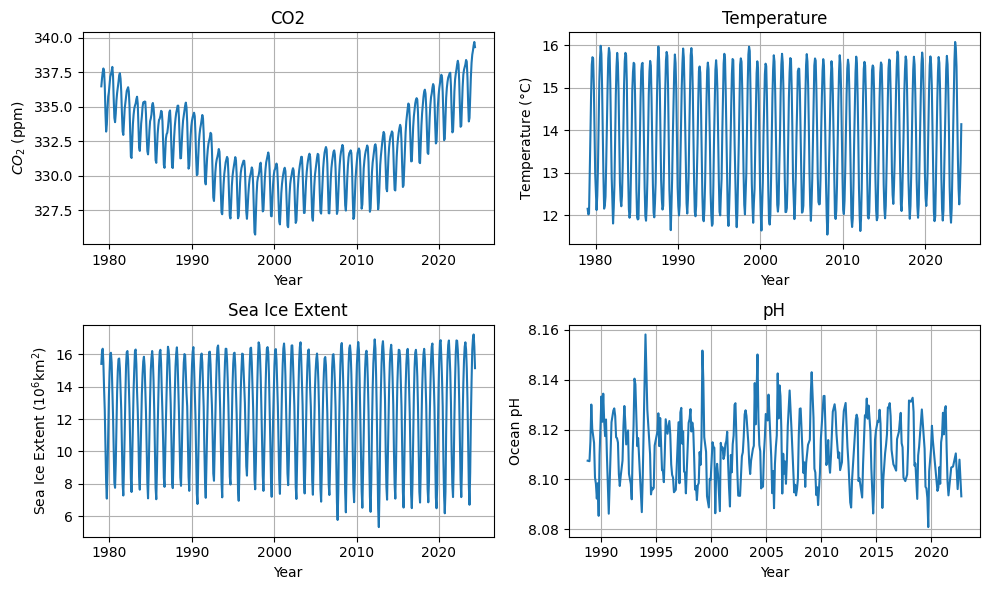

<Figure size 2000x1200 with 0 Axes>

In [96]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
plt.figure(figsize=(20,12))
axs[0, 0].plot(times_np,month_co2)
axs[0, 0].set_title('CO2')
axs[0, 0].grid()
axs[0, 0].set_ylabel('$CO_{2}$ (ppm)')
axs[0, 0].set_xlabel('Year')
axs[0, 1].plot(times_np,month_temp)
axs[0, 1].set_title('Temperature')
axs[0, 1].grid()
axs[0, 1].set_ylabel('Temperature ($\degree$C)')
axs[0, 1].set_xlabel('Year')
axs[1, 0].plot(times_np,month_ice)
axs[1, 0].set_title('Sea Ice Extent')
axs[1, 0].grid()
axs[1, 0].set_ylabel('Sea Ice Extent ($10^6$km$^2$)')
axs[1, 0].set_xlabel('Year')
axs[1, 1].plot(time_int_np,month_ph)
axs[1, 1].set_title('pH')
axs[1, 1].grid()
axs[1, 1].set_ylabel('Ocean pH')
axs[1, 1].set_xlabel('Year')
#fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.savefig('images/monthly.pdf', dpi=300, bbox_inches='tight')

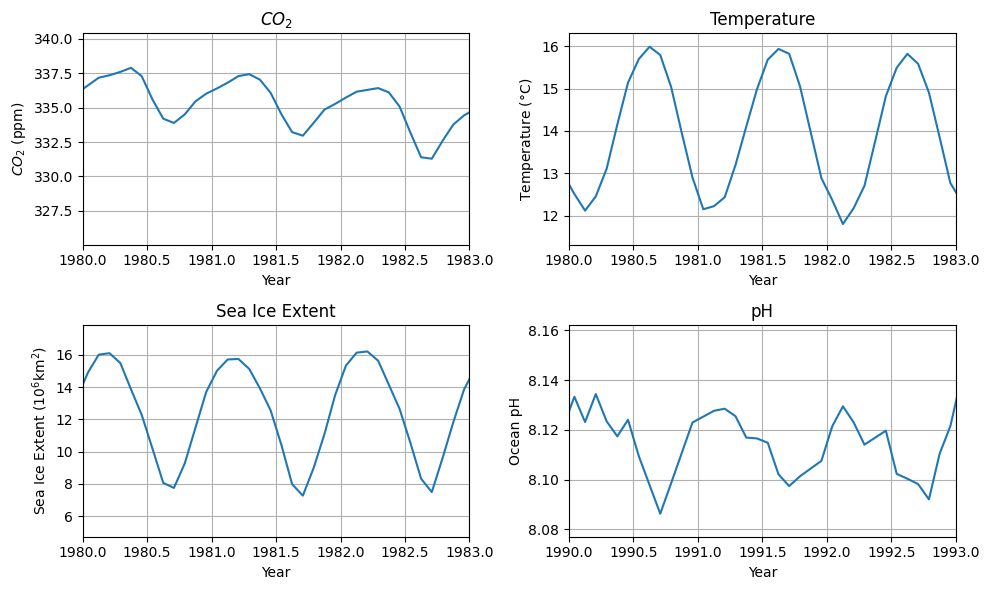

<Figure size 2000x1200 with 0 Axes>

In [98]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
plt.figure(figsize=(20,12))
axs[0, 0].plot(times_np,month_co2)
axs[0, 0].set_title('$CO_{2}$')
axs[0, 0].set_xlim(1980,1983)
start, end = axs[0, 0].get_xlim()
axs[0, 0].xaxis.set_ticks(np.arange(start, end+0.5, 0.5))
axs[0, 0].grid()
axs[0, 0].set_ylabel('$CO_{2}$ (ppm)')
axs[0, 0].set_xlabel('Year')

axs[0, 1].plot(times_np,month_temp)
axs[0, 1].set_title('Temperature')
axs[0, 1].set_xlim(1980,1983)
axs[0, 1].xaxis.set_ticks(np.arange(start, end+0.5, 0.5))
axs[0, 1].grid()
axs[0, 1].set_ylabel('Temperature ($\degree$C)')
axs[0, 1].set_xlabel('Year')

axs[1, 0].plot(times_np,month_ice)
axs[1, 0].set_title('Sea Ice Extent')
axs[1, 0].set_xlim(1980,1983)
axs[1, 0].xaxis.set_ticks(np.arange(start, end+0.5, 0.5))
axs[1, 0].grid()
axs[1, 0].set_ylabel('Sea Ice Extent ($10^6$km$^2$)')
axs[1, 0].set_xlabel('Year')

axs[1, 1].plot(time_int_np,month_ph)
axs[1, 1].set_title('pH')
axs[1, 1].set_xlim(1990,1993)
start2, end2 = axs[1, 1].get_xlim()
axs[1, 1].xaxis.set_ticks(np.arange(start2, end2+0.5, 0.5))
axs[1, 1].grid()
axs[1, 1].set_ylabel('Ocean pH')
axs[1, 1].set_xlabel('Year')

#fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.savefig('images/monthly_zoom.pdf', dpi=300, bbox_inches='tight')

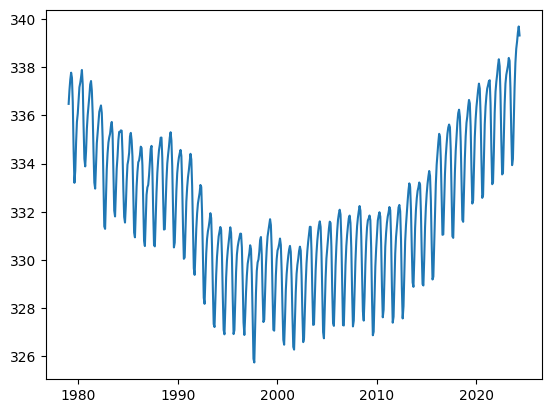

In [67]:
plt.plot(times_np,month_co2)

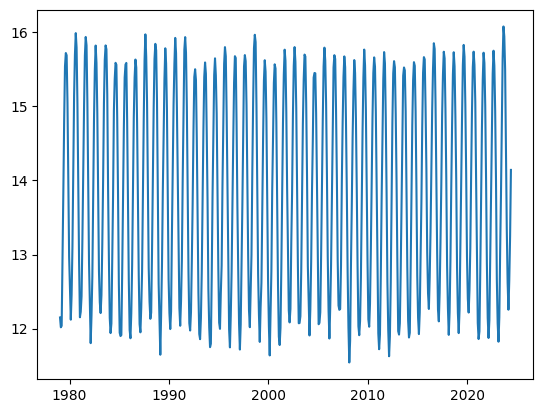

In [70]:
plt.plot(times_np,month_temp)

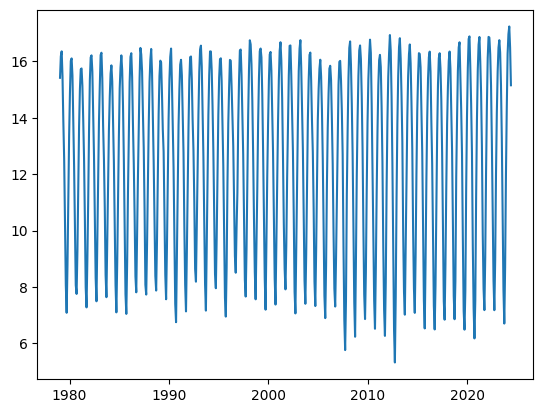

In [71]:
plt.plot(times_np,month_ice)

(1990.0, 1992.0)

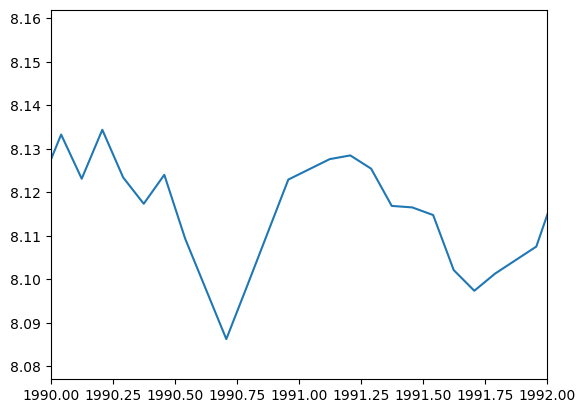

In [74]:
plt.plot(time_int_np,month_ph)
plt.xlim(1990,1992)